In [1]:
# import packages
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# tensorflow version
tf.__version__

/Users/nityansuman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


'1.8.0'

Dataset used is MNSIT Fashion. It is similar to MNSIT.
The dataset which contains 70,000 grayscale images in 10 categories, each of size 28 by 28 pixels.
It is available within keras datasets.

In [2]:
fashion_data = keras.datasets.fashion_mnist # load the fashion dataset

In [3]:
# here 60,000 images are set for train and 10,000 for test
# lets load the data into buckets
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

The returned buckets are nothing but numpy arrays.

In [4]:
# lets view our training and testing data
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# store class labels for the categories: since the dataset only has codes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Data must be processed before training a network. Lets view our first image.

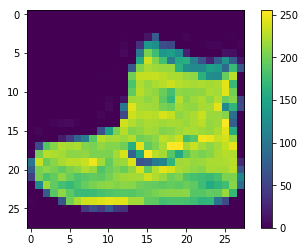

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

You can see that the pixel values fall in the range of 0 to 255. We normalize these values. Basic method for this is to use mean normalization.

In [7]:
train_images = train_images / 255.0

# don't forget to normalize the test image
test_images = test_images / 255.0

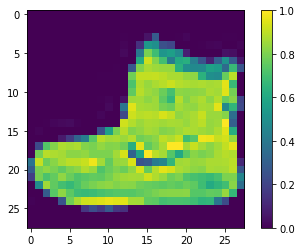

In [8]:
# now lets look at the same thing again
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format.

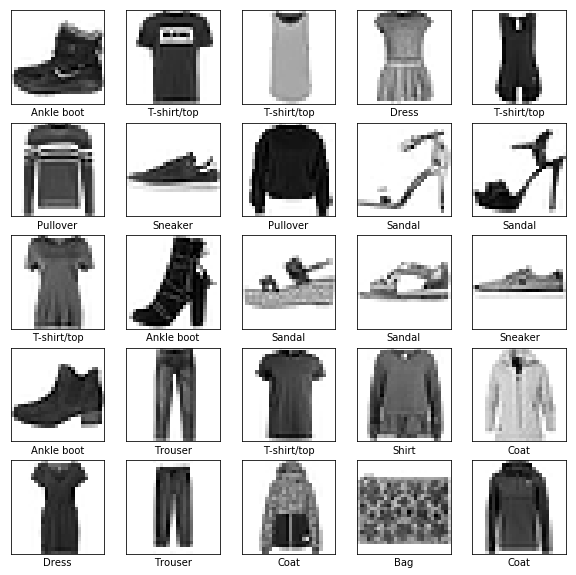

In [9]:
plt.figure(figsize=(10,10)) # set the firgure size 1o by 10 pixels

# plot first 25 images in training data
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False) # remove the grids
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_images[i], cmap=plt.cm.binary) # convert images to gray scale and then plot

Now lets build the model. The network will be fully-connected or densed.

In [10]:
# model:
# input layer of size 784
# 1 hiden layer - 128 neurons
# output layer - 10 neurons
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flatten the image: resultant will be a numpy array for 28*28
    keras.layers.Dense(128, activation=tf.nn.relu), # use relu activation: 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) # use softmax activation:  10 nodes = classes
])

Now we will compile the model

In [11]:
# for our model, we use Adam optimizer with cross entropy as loss function and accuracy metric
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy'])

Now we are ready to train the model

In [12]:
# we tune our model further:
# epochs = number of forward and backward pass for all training example
# 1 epochs = one forward pass and one backward pass of all the training example
# batch size by default is 32: 32 images will be taken at a time for training and will be done for all
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.4976 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3758 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.3380 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3109 - acc: 0.8868
Epoch 5/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2902 - acc: 0.8934


You can see that the training accuracy if about 89%

Now its to evalate our model on the test data. Keep in mind that this is still farely a simple model.

In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/step


[0.34199940288066866, 0.8736]

You can see now that, accuracy is 87%. It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

To overcome overfitting, we continuously montior the traing and test accuracy or loss.

In [14]:
# get the predictions
predictions = model.predict(test_images)

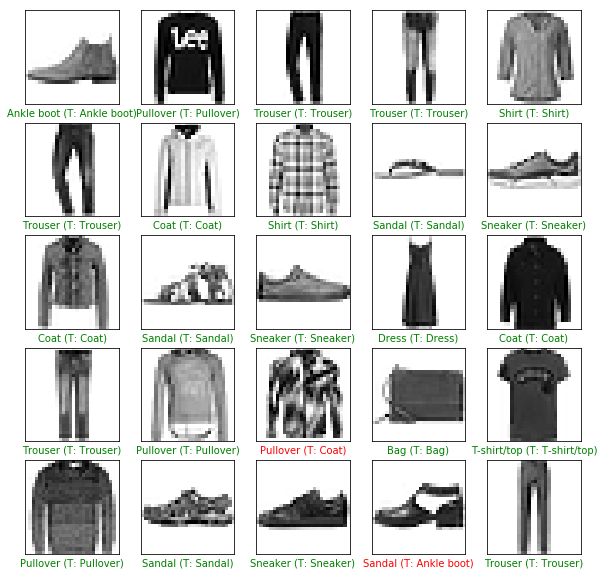

In [15]:
# plot the first 25 test images, their predicted label, and the true label
# color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10)) # set the size of the images

for i in range(25):
    plt.subplot(5, 5, i+1) # create a subplot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) # remove grids
    plt.imshow(test_images[i], cmap=plt.cm.binary) # convert imgaes to gray scale
    predicted_label = np.argmax(predictions[i]) # get the predied label: greatest value of the 10 elements
    true_label = test_labels[i] # get the true label
    if predicted_label == true_label:
      c = 'green'
    else:
      c = 'red'
    # print the class name for both the labels
    plt.xlabel("{} (T: {})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=c)